# Data Visualization Project
Student: Lucas Gabriel Mocellin Teixeira
###### LUISS 2023

## Introduction

The purpose of this project is to select a dataset that allows a network analysis through visualization techniques. 

The data selected is divided into two datasets (BKFRAB and BKRFAC). It concerns interactions among students living in a fraternity at a West Virginia college. All subjects had been residents in the fraternity from three months to three years. BKFRAB records the number of times a pair of subjects were seen in conversation by an "unobtrusive" observer (who walked through the public areas of the building every fifteen minutes, 21 hours a day, for five days). BKFRAC contains rankings made by the subjects of how frequently they interacted with other subjects in the observation week. These data can be found on the following website: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#bkfrat

## Tasks

- Identify clusters/communities: By apllying commuity recognition algorithms and visualizing the social network, it is possible to identify patterns and dynamics of the interactions between students. This could be useful for identifying cliques or subgroups within the fraternity or understanding how information flows through the network.
- Identify the most socially connected students: using data visualization techniques such as network diagrams, it is possible to map out the social connections among the fraternity students. By analyzing the number of interactions between students and their frequency of conversation, the most socially connected students can be identified. This information can be useful in various ways, such as selecting leaders for group projects or identifying potential mentors.
- Analyse degree distribution: It would contribute to understanding the topology or structure of the social network among the fraternity students. Specifically, it would provide information about the distribution of the number of connections or interactions each student has with other students.
- Compare self-reported interactions to observed interactions: Comparing the rankings made by the subjects of how frequently they interacted with other subjects in the observation week to the actual number of times they were seen conversing can provide insights into how accurate people are in self-reporting their social interactions.

## Implementation

#### Import libraries

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import jupyter_dash as jd
import dash
from dash import dcc, html

sns.set()
sns.set_style("white")

#### Read and prepare data

In [2]:
# read matrices (text files)
matrix_b = np.loadtxt('data/bkfratb.txt', dtype=int) # observed data (behavioral)
matrix_c = np.loadtxt('data/bkfratc.txt', dtype=int) # self-report rank (cognitive)

# create a graph object from the adjacency matrix b
G_b = nx.Graph(matrix_b)

# get the edge weights as a list
edge_weights = [G_b[i][j]['weight']/10 for i, j in G_b.edges()]

# create a kamada kawai layout for node positioning
pos = nx.kamada_kawai_layout(G_b)

print("Number of edges: {0}\nNumber of nodes: {1}".format(G_b.number_of_edges(), G_b.number_of_nodes()))

Number of edges: 967
Number of nodes: 58


#### Static Visualizatons

##### Community Visualization
The purpose of this visualization is to understand the dynamics of the behavorial social network: clusters, density, influential individuals and frequency variations.

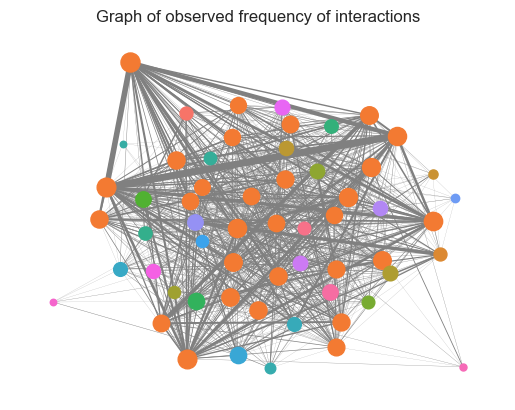

In [3]:
# apply Girvan Newman method for community identification
comp = nx.community.girvan_newman(G_b)
k = 30  # number of communities
for _ in range(k-1):
    comms = next(comp)
    
# define color list from Seaborn color palette
color_list =  sns.color_palette("husl", k)

# create a list of sizes based on vertex's normalized degree centrality
sizes = nx.degree_centrality(G_b)
sizes_sum = sum(sizes.values())
sizes_norm = {node: score / sizes_sum for node, score in sizes.items()}

# create graph with color coded communities
for comm, c in zip(comms, color_list):
    for node in comm:
        nx.draw_networkx_nodes(G_b, pos, nodelist=[node], node_color=[c], node_size=7000*sizes_norm[node])

# plot edges with width according to weights
nx.draw_networkx_edges(G_b, pos, width=edge_weights, edge_color="gray")

plt.title("Graph of observed frequency of interactions")
plt.axis('off')
plt.show()

The above graph presents several features of the social network. Firstly, while the network does not have well-defined communities, it becomes more evident that a group of nodes with higher degree centrality exists as Girvan Newman method undergoes more iterations. In contrast, nodes with lower degree centrality tend to form isolated communities. Additionally, by examining the weights of the edges and the sizes of the nodes, it can be inferred that individuals with fewer connections also have less frequent interactions. Finally, the sizes of the nodes show that no small hub of highly influential individuals exist in this fraternity. Actually, the community algorithm provides the opposite result: there is a high number of well connected individuals and a small number of poorly connected ones.

#### Degree Distribution
The purpose of plotting a degree distribution is to understand the topology of the social network among the fraternity students. Specifically, it provides information about the distribution of the number of connections or interactions each student has with other students.

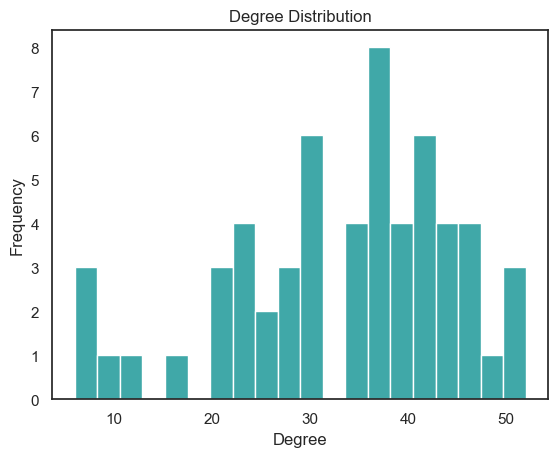

In [4]:
degrees = [degree for (node, degree) in G_b.degree()]

# plot a histogram of the degree distribution
sns.histplot(degrees, kde=False, bins = 20, color='darkcyan')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

The degree distribution depicted in the above graph differs from the typical power-law distribution that is commonly observed in social networks. Instead, it exhibits a distinct pattern, characterized by a small hub of individuals with relatively few connections and a larger hub of individuals with more than 30 connections. The same pattern is also evident in the previous graph. So far, this network analysis has shown that the fraternity students are generally well connected, even though there is a small hub of relatively exlcuded individuals.

### Comparison between observation and self-report
The following scatter plot aims to compare observed interactions with self-reported interactions. Since the values in the two matrices are expressed in different units (one measures the frequency of interactions while the other uses a ranking system from 0 to 5), it was necessary to normalize the data between 0 and 1. This facilitates a more straightforward visual comparison between the two sets of data.

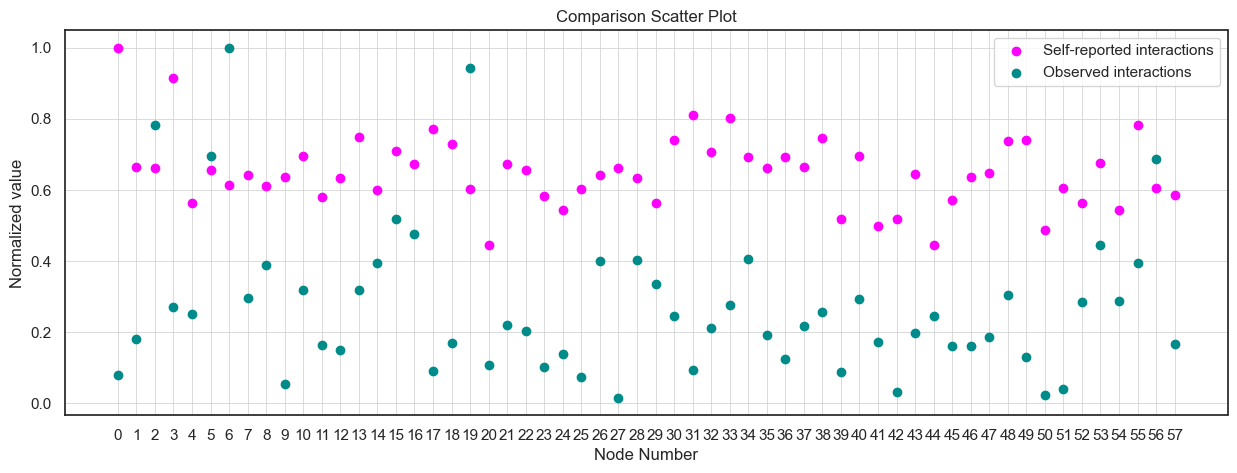

In [5]:
# obtain sum of interactions and average of ratings for each individual
sum_of_int = []
avg_rat = []

i = 0
while i < 58:
    sum_of_int.append(np.sum(matrix_b[i]))
    avg_rat.append(np.mean(matrix_c[i]))
    i=i+1

# normalize each list between 0 and 1
sum_of_int_norm = [i/max(sum_of_int) for i in sum_of_int]
avg_rat_norm = [i/max(avg_rat) for i in avg_rat]

# create a scatter plot that allows the comparison between the two datasets
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(G_b.nodes(), avg_rat_norm, color='magenta', label='Self-reported interactions')
ax.scatter(G_b.nodes(), sum_of_int_norm, color='darkcyan', label='Observed interactions')
ax.set_xlabel('Node Number')
ax.set_ylabel('Normalized value')
major_ticks = np.arange(0, 58, 1)
minor_ticks = np.arange(0, 1, 0.05)
ax.set_xticks(major_ticks, major=True)
ax.set_yticks(minor_ticks, minor=True)
ax.set_title('Comparison Scatter Plot')
ax.grid(linewidth=0.5)
ax.legend()
plt.show()

The plot above illustrates a disparity between self-reported interactions and observed interactions, with the former being consistently higher than the latter. This discrepancy could be interpreted in two ways: either the fraternity students are overestimating their social interactions, or the data for observed interactions is insufficiently comprehensive. The latter scenario would suggest that some interactions have gone unrecorded.

### Interactive Visualization
The interactive heatmap displayed below represents the frequency of interactions between individuals, as represented by the weight of the edges. To prevent the heatmap from being dominated by extreme values, the frequency values were converted into logarithmic values.

This visualization allows the user to box select a group of nodes and hover over the data to view additional information on the frequency values. Additionally, the data can be filtered according to five frequency value ranges.

First of all, it is necessary to create a matrix that represents the "rank", according to the range the frequency value is in.

In [6]:
# initialize an empty 58x58 matrix
rank_matrix = np.zeros((58, 58))

# fill the adjacency matrix with values from 0 to 5 according to the frequency value
for i in range(58):
    for j in range(58):
        if matrix_b[i,j] == 0:
            val = 0

        elif 0 < matrix_b[i,j] <= 3:
            val = 1

        elif 3 < matrix_b[i,j] <= 5:
            val = 2
        
        elif 5 < matrix_b[i,j] <= 15:
            val = 3

        elif 15 < matrix_b[i,j] <= 25:
            val = 4
        
        else:
            val = 5

        rank_matrix[i,j] = val

Below is the code for generating the interactive heatmap

In [7]:
# Convert adjacency matrices to dataframes
freq_df = pd.DataFrame(matrix_b)
rank_df = pd.DataFrame(rank_matrix)

# Create JupyterDash app
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = jd.JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Define app layout
app.layout = html.Div([
    # Dropdown for selecting node rank
    dcc.Dropdown(
        id='rank-dropdown',
        options=[{'label': str(i), 'value': i} for i in range(6)] +
                [{'label': 'All data', 'value': 'all'}],
        value='all'
    ),
    # Plotly heatmap figure
    dcc.Graph(id='heatmap', style={'height': '800px'})
])

# Define callback to update heatmap based on selected node rank
@app.callback(
    dash.dependencies.Output('heatmap', 'figure'),
    [dash.dependencies.Input('rank-dropdown', 'value')])
def update_heatmap(selected_rank):
    # Filter adjacency matrix and node rank matrix based on selected rank
    if selected_rank == 'all':
        filtered_freq_matrix = freq_df
        filtered_rank_matrix = rank_df
    else:
        filtered_freq_matrix = freq_df.where(rank_df == selected_rank)
        filtered_rank_matrix = rank_df.where(rank_df == selected_rank)

    # Take the log of the frequency values
    filtered_freq_matrix_log = np.log(filtered_freq_matrix+1)

    # Create Plotly heatmap figure
    fig = px.imshow(filtered_freq_matrix_log,
                    labels=dict(x="Node ID", y="Node ID", color="Frequency (log)"),
                    color_continuous_scale='PuBu',
                    range_color=[0, 3.95])

    # Add hovertext to show frequency values
    fig.update_traces(hovertemplate="Frequency (log): %{z:.2f}",
                      customdata=filtered_rank_matrix.values)

    # Enable box selection
    fig.update_layout(dragmode='select')

    # Return updated figure
    return fig

# Run JupyterDash app
app.run_server(mode='inline')

The interactive visualization above offers users a comprehensive overview of interaction frequency. Upon examining the full dataset, it is possible to infer that there is a considerable amount of frequent interactions, even though most of them are in the lower ranks (below 3). Furthermore, the extremely frequent highly-ranked interactions (rank 5) can skew the average frequency and create a disproportionate color shift. To counteract this effect, the frequency values were transformed using a logarithmic function.